Testing Benchmark models on the dataset to figure out the key parameters that can be used to improve the model performance.

In [39]:
# importing libraries
import os
import pandas as pd
import numpy as np

In [5]:
# Converting the parquet files to csv files for all the years
def convert_parquet_to_csv():
    cwd = os.getcwd()
    pgm_folder = os.path.join(cwd, 'pgm')
    csv_folder = os.path.join(cwd, 'csv')
    if not os.path.exists(csv_folder):
        os.makedirs(csv_folder)
    subfolders = [f.path for f in os.scandir(pgm_folder) if f.is_dir()]
    # iterate over all the subfolders
    for subfolder in subfolders:
        # get the year from the subfolder name
        year = subfolder.split('/')[-1]
        parquet_files = [f.path for f in os.scandir(subfolder) if f.is_file() and f.name.endswith('.parquet')]
        # iterate over all the parquet files
        for parquet_file in parquet_files:
            df = pd.read_parquet(parquet_file)
            file_name = parquet_file.split('/')[-1].split('.')[0]
            csv_file = os.path.join(csv_folder, year + '_' + file_name + '.csv')
            df.to_csv(csv_file, index=False)
            print('Converted', parquet_file, 'to', csv_file)


In [6]:
if __name__ == '__main__':
    convert_parquet_to_csv()

Converted /Users/sauhardsharma/Desktop/DL_Project/pgm/year=1998/9b5cbc69a393493fb2002b4a53188b67-0.parquet to /Users/sauhardsharma/Desktop/DL_Project/csv/year=1998_9b5cbc69a393493fb2002b4a53188b67-0.csv
Converted /Users/sauhardsharma/Desktop/DL_Project/pgm/year=1991/9b5cbc69a393493fb2002b4a53188b67-0.parquet to /Users/sauhardsharma/Desktop/DL_Project/csv/year=1991_9b5cbc69a393493fb2002b4a53188b67-0.csv
Converted /Users/sauhardsharma/Desktop/DL_Project/pgm/year=1996/9b5cbc69a393493fb2002b4a53188b67-0.parquet to /Users/sauhardsharma/Desktop/DL_Project/csv/year=1996_9b5cbc69a393493fb2002b4a53188b67-0.csv
Converted /Users/sauhardsharma/Desktop/DL_Project/pgm/year=1997/9b5cbc69a393493fb2002b4a53188b67-0.parquet to /Users/sauhardsharma/Desktop/DL_Project/csv/year=1997_9b5cbc69a393493fb2002b4a53188b67-0.csv
Converted /Users/sauhardsharma/Desktop/DL_Project/pgm/year=1990/9b5cbc69a393493fb2002b4a53188b67-0.parquet to /Users/sauhardsharma/Desktop/DL_Project/csv/year=1990_9b5cbc69a393493fb2002b4a

In [3]:
from tqdm import tqdm

In [9]:
# Reading all the csv files and appending them to a single dataframe
def read_all_csv_files():
    cwd = os.getcwd()
    # path to the csv folder
    csv_folder = os.path.join(cwd, 'csv')
    csv_files = [f.path for f in os.scandir(csv_folder) if f.is_file() and f.name.endswith('.csv')]
    df = pd.DataFrame()
    for csv_file in tqdm(csv_files):
        temp_df = pd.read_csv(csv_file)
        df = pd.concat([df, temp_df])
    df.reset_index(drop=True, inplace=True)
    return df

read_all_csv_files()


100%|██████████| 31/31 [02:29<00:00,  4.82s/it]


,month_id,priogrid_gid,ged_sb,ged_os,ged_ns,ln_pop_gpw_sum,decay_ged_sb_1,decay_ged_sb_25,decay_ged_os_1,decay_ged_sb_5,...,treelag_1_os,treelag_2_ns,treelag_2_os,sptime_dist_k1_ged_os,sptime_dist_k1_ged_ns,sptime_dist_k10_ged_os,sptime_dist_k10_ged_ns,sptime_dist_k001_ged_os,sptime_dist_k001_ged_ns,month
0,433,62356,0.0,0.0,0.0,0.000000,0.000004,0.000004,0.000004,1.455192e-11,...,3.985346,0.019056,0.027109,35.608988,45.915684,44.322680,54.664888,17.019060,17.497774,1
1,433,79599,0.0,0.0,0.0,9.145198,0.000004,0.000004,0.000004,1.455192e-11,...,5.488608,0.031845,0.050813,29.736341,35.174565,33.049206,41.584252,2.814765,2.206377,1
2,433,79600,0.0,0.0,0.0,8.394584,0.000004,0.000004,0.000004,1.455192e-11,...,5.488975,0.031858,0.050815,29.605743,35.064227,32.901368,41.743263,2.858828,2.370253,1
3,433,79601,0.0,0.0,0.0,9.903443,0.000004,0.000004,0.000004,1.455192e-11,...,5.488996,0.031868,0.050813,29.483046,34.960692,32.760495,41.907637,2.987122,2.620706,1
4,433,80317,0.0,0.0,0.0,12.290978,0.000004,0.000004,0.000004,1.455192e-11,...,5.535628,0.032332,0.051720,29.563491,35.014283,32.893768,40.804412,2.696757,2.148977,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4850695,456,190496,0.0,0.0,0.0,10.408626,0.000002,0.000002,0.000002,3.854304e-12,...,2.690815,0.855021,0.048690,11.090537,10.547512,11.661904,10.547512,1.418485,10.404345,12
4850696,456,190507,0.0,0.0,0.0,6.647283,0.000002,0.000002,0.000002,3.854304e-12,...,2.952080,2.211546,0.076720,7.433034,6.519202,7.433034,6.519202,2.562733,6.519202,12
4850697,456,190508,0.0,0.0,0.0,4.562102,0.000002,0.000002,0.000002,3.854304e-12,...,2.972657,2.347626,0.079592,7.106335,6.264982,7.106335,6.264982,2.705106,6.264982,12
4850698,456,190510,0.0,0.0,0.0,7.619576,0.000002,0.000002,0.000002,3.854304e-12,...,3.010577,2.625784,0.085243,6.519202,5.852350,6.519202,5.852350,3.212102,5.852350,12


Random Forest Classifier

In [16]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [22]:
from sklearn.metrics import f1_score

In [25]:
def random_forest_benchmark(file_name):
    cwd = os.getcwd()
    csv_folder = os.path.join(cwd, 'csv')
    csv_file = os.path.join(csv_folder, file_name)
    df = pd.read_csv(csv_file)
    X = df.drop('ged_sb', axis=1)
    y = df['ged_sb']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')  # using f1 since dataset is multiclass
    return accuracy, f1

In [26]:
random_forest_benchmark('year=1990_9b5cbc69a393493fb2002b4a53188b67-0.csv')

(0.9985062293414696, 0.06164584036924463)

In [27]:
random_forest_benchmark('year=1995_9b5cbc69a393493fb2002b4a53188b67-0.csv')

(0.9979341469616069, 0.06423845404108561)

In [28]:
random_forest_benchmark('year=2000_9b5cbc69a393493fb2002b4a53188b67-0.csv')

(0.998093058733791, 0.07711900502598176)

In [29]:
random_forest_benchmark('year=2005_9b5cbc69a393493fb2002b4a53188b67-0.csv')

(0.9982201881515382, 0.09492063492063492)

Feature Importance

In [30]:
def feature_importance(file_name):
    cwd = os.getcwd()
    csv_folder = os.path.join(cwd, 'csv')
    csv_file = os.path.join(csv_folder, file_name)
    df = pd.read_csv(csv_file)
    X = df.drop('ged_sb', axis=1)
    y = df['ged_sb']
    clf = RandomForestClassifier()
    clf.fit(X, y)
    feature_importance = clf.feature_importances_
    return feature_importance


In [31]:
feature_importance('year=1990_9b5cbc69a393493fb2002b4a53188b67-0.csv')

array([3.61457516e-03, 8.28246817e-03, 2.62447734e-03, 2.60151132e-04,
       5.92453859e-03, 1.40961588e-02, 6.14433551e-03, 5.10807933e-03,
       9.06863634e-03, 4.18004452e-03, 4.15140306e-03, 4.40050020e-03,
       3.40984423e-03, 4.21223515e-03, 3.83460919e-03, 3.90039213e-03,
       3.57003536e-03, 3.30896273e-03, 2.96064441e-03, 7.47360627e-03,
       8.55590956e-03, 6.31642176e-03, 4.32375677e-03, 4.71808127e-03,
       4.33288570e-03, 1.91867684e-03, 1.15550757e-03, 5.36561006e-03,
       5.40531709e-03, 4.85568055e-03, 6.86637130e-03, 4.67822600e-03,
       6.74265208e-03, 7.74937434e-04, 4.94905978e-04, 1.49881318e-04,
       5.39112570e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.16861499e-04, 7.04321136e-03, 1.88383256e-03,
       3.48294360e-03, 4.54793937e-03, 4.30591182e-03, 6.33147358e-03,
       6.76390412e-03, 6.81527308e-03, 1.03576379e-03, 2.84554624e-03,
       6.28523380e-03, 4.66321982e-03, 3.58150375e-03, 4.62273333e-03,
      

In [32]:
import matplotlib.pyplot as plt

In [42]:
def plot_feature_importance(file_name):
    importances = feature_importance(file_name)
    plt.bar(range(len(importances)), importances)
    plt.xlabel('Feature Index')
    plt.ylabel('Importance')
    plt.title('Feature Importance')
    plt.show()

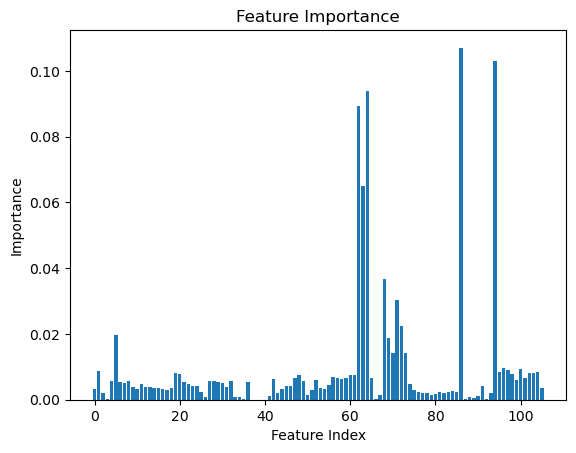

In [43]:
plot_feature_importance('year=1990_9b5cbc69a393493fb2002b4a53188b67-0.csv')

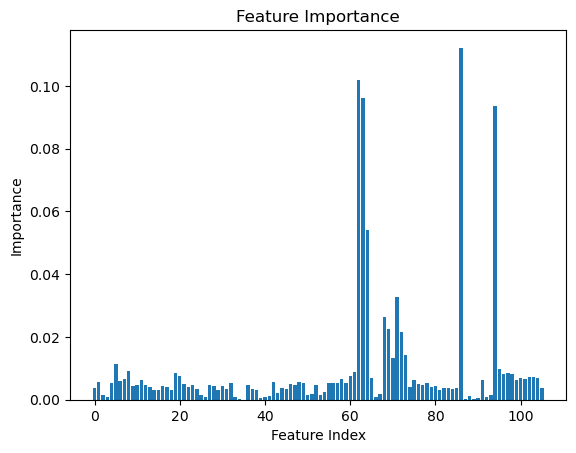

In [44]:
plot_feature_importance('year=1995_9b5cbc69a393493fb2002b4a53188b67-0.csv')

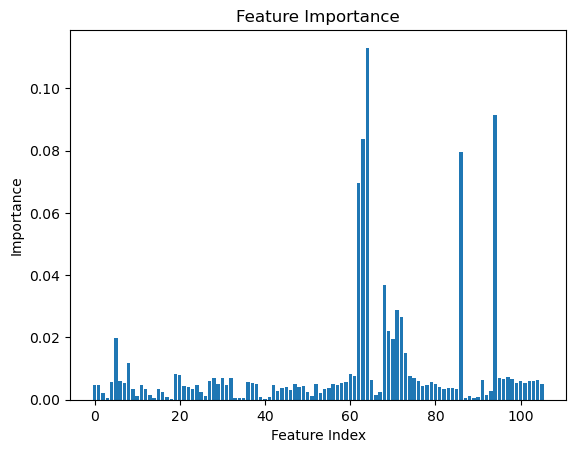

In [45]:
plot_feature_importance('year=2020_9b5cbc69a393493fb2002b4a53188b67-0.csv')